<a href="https://colab.research.google.com/github/RedietNegash/TrainingMaterials/blob/gp/TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Problem Understanding**
- We are given a list of cities, each with its coordinates.  
  Example: Let’s say we have 4 cities: CityA(0, 0), CityB(1, 0), CityC(0, 1), CityD(1, 1).

- The objective is to find the shortest route that visits all the cities exactly once and returns to the starting city.  
  A possible route would be CityA → CityB → CityC → CityD → CityA.

- **Optimization Goal**: Minimize the total travel distance.


# **Approach**
- We will solve this problem using a Genetic Algorithm.

- The solution is based on these key genetic operations:

  1. **Fitness Function**: The fitness function evaluates the quality of each route. Specifically, it calculates the total distance of the route, with shorter distances indicating better fitness.  
     The fitness of a route is determined by the `totalRouteDistance` function.

  2. **Selection**: Choose the best-fit candidates.  
     We will use tournament selection to choose the best-fit candidates from the population.  
     Example: If we have five different routes, we will randomly select a few of them (a tournament) and then choose the one with the shortest distance to be a parent for the next generation.

  3. **Crossover**: We will use single-point crossover to create new routes from the selected parents.  
     This means that we will take a part of one parent's route and combine it with a part of another parent's route to form two new routes.  
     Example: If we have two routes, we will randomly select a point and swap the sequences of cities after that point.

  4. **Mutation**: We will introduce small random changes to some of the routes to keep the population diverse.  
     An example of this would be randomly swapping the positions of two cities in a route.  
     Example: Randomly swapping the order of two cities in a route.

  5. **Evolution Process**: The algorithm iterates through generations, applying selection, crossover, and mutation to produce new populations.  
     This process continues until a solution is found or a predefined condition (such as a target distance or maximum generations) is met.



# **Constraints**
- Each city should be visited exactly once in the solution.



**code**

Generation 10, Best Distance: 491.7615510984273

----------------------------------------------------------------
Generation: 12
Initial best route distance: 669.6179029201295
Optimal route distance after evolution: 443.56754324245077
Target distance: 450.0

Route (city names in order of visit):
21 -> 29 -> 3 -> 2 -> 9 -> 10 -> 30 -> 16 -> 20 -> 22 -> 1 -> 13 -> 14 -> 6 -> 27 -> 11 -> 5 -> 15 -> 12 -> 19 -> 4 -> 17 -> 18 -> 25 -> 24 -> 7 -> 23 -> 26 -> 8 -> 28

Number of cities visited: 30
Total distance covered: 443.57
----------------------------------------------------------------



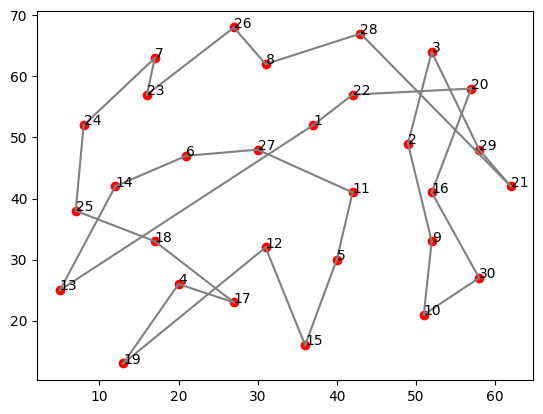

In [5]:
import random
import math
import matplotlib.pyplot as plt


def getCity():
    """Reads city coordinates from a text file and returns them as a list."""
    cities = []
    with open("city_coordinates.txt") as f:
        for line in f:
            node_city_val = line.split()
            cities.append([node_city_val[0], float(node_city_val[1]), float(node_city_val[2])])
    return cities

def calcDistance(cityA, cityB):
    """Calculates the Euclidean distance between two cities."""
    return math.sqrt((cityB[1] - cityA[1]) ** 2 + (cityB[2] - cityA[2]) ** 2)

def totalRouteDistance(route):
    """Calculates the total distance of a given route, including the return to the start city."""
    return sum(calcDistance(route[i], route[i + 1]) for i in range(len(route) - 1)) + calcDistance(route[0], route[-1])

def selectPopulation(cities, population_size):
    """Generates an initial population of random routes and returns the population along with the fittest route."""
    population = []
    for _ in range(population_size):
        random_route = cities.copy()
        random.shuffle(random_route)
        distance = totalRouteDistance(random_route)
        population.append((distance, random_route))


    population.sort(key=lambda x: x[0])
    return population, population[0]

def tournament_selection(population, tournament_size):
    """
    Selects a route using tournament selection from a subset of the population.

    A random subset of routes (or chromosomes) is selected from the population.
    The route with the shortest distance (best fitness) from this subset is chosen.
    """
    selected = random.sample(population, tournament_size)
    return min(selected, key=lambda x: x[0])

def crossover(parent1, parent2):
    """
    Performs one-point crossover between two parent routes.

    This function creates two new child routes by combining parts of two parent routes.
    A single crossover point is chosen, and the first part of one parent is combined with
    the remaining cities from the other parent (in order).
    """
    size = len(parent1[1])
    crossover_point = random.randint(1, size - 1)


    child1 = parent1[1][:crossover_point] + [city for city in parent2[1] if city not in parent1[1][:crossover_point]]
    child2 = parent2[1][:crossover_point] + [city for city in parent1[1] if city not in parent2[1][:crossover_point]]

    return child1, child2

def mutate(route, mutation_rate):
    """Mutates a route by swapping two cities with a given mutation rate."""
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(route)), 2)
        route[idx1], route[idx2] = route[idx2], route[idx1]

def geneticAlgorithm(population, number_of_cities, tournament_size, mutation_rate, crossover_rate, target_distance):
    """
    Evolve the population to find shorter routes using a genetic algorithm.
    Runs for up to max 200 generations, keeping the best routes(Elitism), selecting parents,
    performing crossover and mutation, and updating the population.
    Stops early if the best distance is below the target.
    Returns the best route and the number of generations.
    """
    generation_count = 0
    population_size = len(population)

    while generation_count < 200:
        new_population = population[:2]  # Elitism: retain the two fittest routes

        for _ in range((population_size - 2) // 2):
            parent1 = tournament_selection(population, tournament_size)
            parent2 = tournament_selection(population, tournament_size)

            if random.random() < crossover_rate:
                child1, child2 = crossover(parent1, parent2)
            else:
                child1 = parent1[1]
                child2 = parent2[1]

            mutate(child1, mutation_rate)
            mutate(child2, mutation_rate)

            new_population.append((totalRouteDistance(child1), child1))
            new_population.append((totalRouteDistance(child2), child2))

        # Sort new population by fitness (distance)
        population = sorted(new_population, key=lambda x: x[0])

        generation_count += 1
        if generation_count % 10 == 0:
            print(f"Generation {generation_count}, Best Distance: {population[0][0]}")

        if population[0][0] < target_distance:
            break

    return population[0], generation_count
def drawMap(cities, answer):
    """Visualizes the cities and the optimal route found by the genetic algorithm."""
    for city in cities:
        plt.plot(city[1], city[2], "ro")
        plt.annotate(city[0], (city[1], city[2]))

    route = answer[1]
    for i in range(len(route)):
        plt.plot([route[i][1], route[(i + 1) % len(route)][1]], [route[i][2], route[(i + 1) % len(route)][2]], "gray")

    plt.show()

def main():
    POPULATION_SIZE = 2000
    TOURNAMENT_SELECTION_SIZE = 4
    MUTATION_RATE = 0.1
    CROSSOVER_RATE = 0.9
    TARGET = 450.0  # Target distance to achieve

    cities = getCity()
    firstPopulation, firstFittest = selectPopulation(cities, POPULATION_SIZE)
    answer, genNumber = geneticAlgorithm(
        firstPopulation,
        len(cities),
        TOURNAMENT_SELECTION_SIZE,
        MUTATION_RATE,
        CROSSOVER_RATE,
        TARGET,
    )


    print("\n----------------------------------------------------------------")
    print(f"Generation: {genNumber}")
    print(f"Initial best route distance: {firstFittest[0]}")
    print(f"Optimal route distance after evolution: {answer[0]}")
    print(f"Target distance: {TARGET}")
    print("\nRoute (city names in order of visit):")
    print(" -> ".join(city[0] for city in answer[1]))
    print(f"\nNumber of cities visited: {len(answer[1])}")
    print(f"Total distance covered: {answer[0]:.2f}")
    print("----------------------------------------------------------------\n")

    drawMap(cities, answer)

if __name__ == "__main__":
    main()


After 12 generations, the algorithm improved the initial best route distance from approximately **669.62** to an optimal route distance of **443.57**, successfully meeting almost the target distance of **450.0**. The route visits a total of **30 cities** in the as shown. it shows that the algorithm converged to a good solution very quickly(hit the target distance), without needing to run for the full 200 generations.